In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scqubits as sq
import scipy.constants as const
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from utilities import *
from tqdm.notebook import tqdm

In [6]:
filedirectory = "S:\\FERBO\\FB_W10_S4\\run2"
datasets = {}

data_number_list = [
    # 413199, #big upper map
    411703, # largo
    412505, # bueno
    412666
]

for datanumber in tqdm(data_number_list):
    datasets[datanumber] = load_data(filedirectory + "\\FBW10S4_" +str(datanumber))

  0%|          | 0/3 [00:00<?, ?it/s]

g from fit A is [19.52221779] MHz
g from fit B is [18.39081972] MHz


 c:\Users\jc269556\Documents\analysis\utilities.py: 119

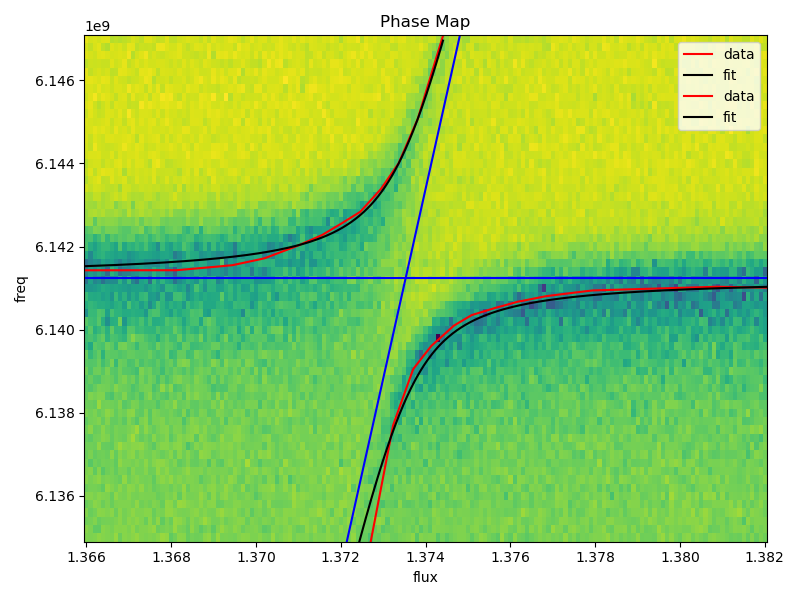

In [50]:
########################  fit with the spline  ##########################

%matplotlib widget

curvaA = np.loadtxt("U:\\Commun\\Projet FERBO\\Simulations\\splineA.txt")
curvaB = np.loadtxt("U:\\Commun\\Projet FERBO\\Simulations\\splineB.txt")

iA = np.argmin(np.abs(curvaA[:,0] - 1.37443))
iB = np.argmin(np.abs(curvaB[:,0] - 1.37243))

xA = curvaA[:iA,0]
xB = curvaB[iB:,0]
x = np.arange(1.366,1.382,0.0001)
fr = 6.14125e9
fq = 4.566e9*x - 0.1303e9

def cA(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq +np.sqrt((fq - fr)**2 + (g/np.pi)**2))

def cB(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq - np.sqrt((fq - fr)**2 + (g/np.pi)**2))


poptA, pcovA = curve_fit(cA, xA, curvaA[:iA,1], p0 = 10e6)
print('g from fit A is', poptA*1e-6, 'MHz')

poptB, pcovB = curve_fit(cB, xB, curvaB[iB:,1], p0 = 10e6)
print('g from fit B is', poptB*1e-6, 'MHz')

fig, ax, mesh = plot_phase_map(datasets[412505], 'flux', 'freq', 'amp', title='Phase Map', correct_horizontal=False, correct_vertical=False, fig=None, ax=None)
ax.axhline(6.14125e9,c='b')
ax.plot(x,fq,'b')

ax.plot(xA, curvaA[:iA,1],color='r', label='data')
ax.plot(xA,cA(xA,poptA),color = 'k', label='fit')

ax.plot(xB, curvaB[iB:,1],color='r', label='data')
ax.plot(xB,cB(xB,poptB),color = 'k', label='fit')


ax.legend()
# ax.plot(x,cB(x,poptB),color = 'b', label='fit')

plt.ylim([6.1349e9,6.14708e9])
plt.show()


In [587]:
# def dip_slope(w, w0, m, b, a, Q):   # entre 0 y 10
#     w0 = w0*1e9
#     m = m*1e-8
#     b = b *100
#     Q = Q*1000

#     y = (w-w0)/w0
#     return b + m*w + np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2))

# def dip_step(w, w0, step, a, Q):   # entre 0 y 10
#     w0 = w0*1e9
#     Q = Q*1000

#     y = (w-w0)/w0
#     return 0.5*step*(1 + np.tanh(.0000004*(w - 6.141e9))) + np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2))


amp = datasets[412505]['amp']
ampV = np.sqrt(0.05)*10**(amp/20)
amp_norm = ampV/ampV.mean()
x = datasets[412505]['flux']
iA = np.argmin(np.abs(x - 1.37443))
xA = x[:iA]
iB = np.argmin(np.abs(x - 1.37243)) + 6
xB = x[iB:]

y = datasets[412505]['freq']
y = y[0,:]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 6.14304215  8.16917761 -5.01503214  0.59949789  2.0512432 ]
 w0 =  6.143042147065818 GHz
[ 6.14035796  1.99817025 -0.08539394  3.95190116]
 w0 =  6.14035795545178 GHz


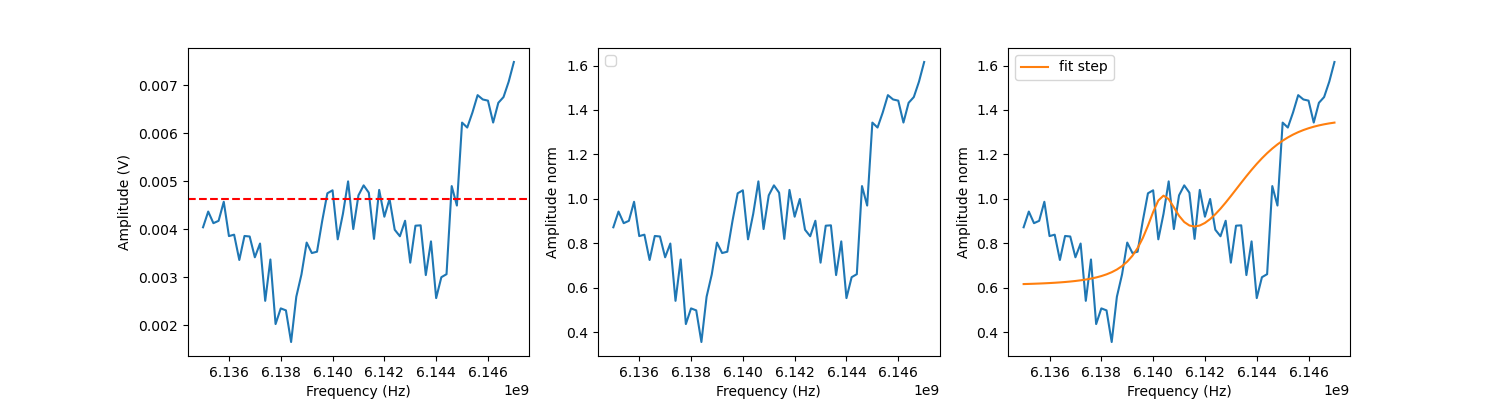

In [510]:
x_value = 1.3734

ix = np.argmin(np.abs(x - x_value))
# amp_norm = ampV[ix,:]/ampV[ix,:].mean()

fig,ax = plt.subplots(1,3,figsize = (15,4))#, sharey=True)
ax[0].plot(y,ampV[ix,:])
ax[0].axhline(ampV.mean(),color='r', linestyle='--')
ax[0].set_ylabel('Amplitude (V)')
ax[0].set_xlabel('Frequency (Hz)')

# fit_params_slope, _ = curve_fit(dip_slope, y, amp_norm[ix,:] , p0 = [6.141, 6, -3.68, 0.5, 1])  # params bw 1 and 10
ax[1].plot(y,amp_norm[ix,:])
# ax[1].plot(y,dip_slope(y,fit_params_slope[0],fit_params_slope[1],fit_params_slope[2],fit_params_slope[3], fit_params_slope[4]), label = 'fit slope') 
ax[1].set_ylabel('Amplitude norm')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].legend()

print(fit_params_slope)
print(' w0 = ',fit_params_slope[0], 'GHz')

fit_params_step, _ = curve_fit(dip_step, y, amp_norm[ix,:] , p0 = [6.141, 0.6, 0.5, 1])  # params bw 1 and 10
ax[2].plot(y,amp_norm[ix,:])
ax[2].plot(y,dip_step(y,fit_params_step[0],fit_params_step[1],fit_params_step[2],fit_params_step[3]), label = 'fit step')
ax[2].set_ylabel('Amplitude norm')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].legend()

print(fit_params_step)
print(' w0 = ',fit_params_step[0], 'GHz')



In [446]:
####################  finding points for curve A  ######################

step = 0.75
slope = 0.00000045
center = 6.143e9
offset = -1.39

def dip_step(w, w0, s, a, Q):   # entre 0 y 10
    w0 = w0*1e9
    Q = Q*1000

    y = (w-w0)/w0
    return 0.5*step*(1 + np.tanh(slope*(w - center))) + s*np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2)) + offset

p0 = [6.1413, 2.25, 0.16,  2.55]
fit_params  = np.zeros((len(xA),len(p0)))
fit_params[-1,:]  = p0

for i, x_value in enumerate(xA):

    limit_w = max(y[0] , 1.78796e9*x_value + 3.68549e9)
    limit_ind = np.argmin(np.abs(y - limit_w))
    fit_params[i,:], _ = curve_fit(dip_step, y[limit_ind:], amp_norm[i,limit_ind:] , p0 = fit_params[i-1,:])

curveA = 1e9*fit_params[:,0]


In [592]:
####################  finding points for curve B  ######################

step = 0.75
slope = 0.00000045
center = 6.140e9
offset = -1.39

def dip_step(w, w0, s, a, Q):   # entre 0 y 10
    w0 = w0*1e9
    Q = Q*1000

    y = (w-w0)/w0
    return 0.5*step*(1 + np.tanh(slope*(w - center))) + s*np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2)) + offset

p0 = [6.13759 , 2.126 ,0.474,94.27]
fit_params  = np.zeros((len(xB),len(p0)))
fit_params[-1,:]  = p0

# x_start = y[0] - 3.68549e9)/1.78796e9
# start_ind = np.argmin(np.abs(x - x_start))

for i, x_value in enumerate(xB):

    limit_w = min(y[-1] , 1.78796e9*x_value + 3.68549e9)
    limit_ind = np.argmin(np.abs(y - limit_w))
    fit_params[i,:], _ = curve_fit(dip_step, y[:limit_ind], amp_norm[iB + i,:limit_ind] , p0 = fit_params[i-1,:])


curveB = 1e9*fit_params[:,0]

[ 6.13759931  2.11332403  0.05474935 11.14631461]
1.373 6140359080.0


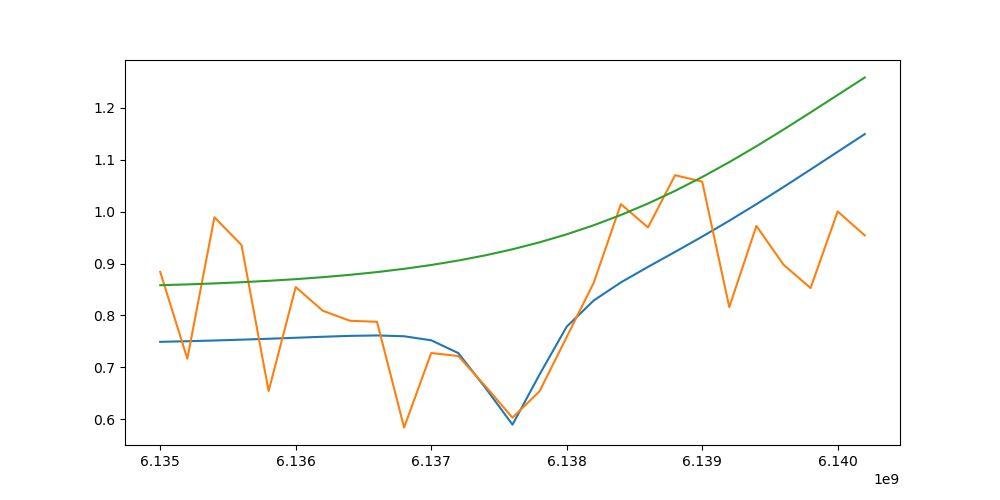

In [591]:

plt.close('all')
step = 0.75
slope = 0.00000045
center = 6.140e9
offset = -1.37
# s = 2.29064911

def dip_step(w, w0, s, a, Q):   # entre 0 y 10
    w0 = w0*1e9
    Q = Q*1000

    y = (w-w0)/w0
    return 0.5*step*(1 + np.tanh(slope*(w - center))) + s*np.sqrt(1 + 4*a*(a-1)/(1+4*Q**2*y**2)) + offset

i = 0
limit_w = min(y[-1] ,  1.78796e9*xB[i] + 3.68549e9)
limit_ind = np.argmin(np.abs(y - limit_w))
fit_params_, _ = curve_fit(dip_step, y[:limit_ind], amp_norm[iB + i,:limit_ind], p0 = [6.13759 , 2.126 ,0.474,94.27])
# fit_params_, _ = curve_fit(dip_step, y[:limit_ind], amp_norm[iB + i,:limit_ind] , p0 = fit_params[i-1,:])

fig, ax = plt.subplots(1,1,figsize = (10,5), sharey=True)
ax.plot(y[:limit_ind],dip_step(y[:limit_ind],fit_params_[0],fit_params_[1],fit_params_[2] ,fit_params_[3]))#,fit_params_[4])) 
# ax.plot(y[:limit_ind],dip_step(y[:limit_ind], 6.14025939, 2.29064911, 0.1649742, 3.44429617))
ax.plot(y[:limit_ind], amp_norm[iB + i,:limit_ind])
ax.plot(y[:limit_ind], .85 + 0.5*step*(1 + np.tanh(slope*(y[:limit_ind] - center))))

print(fit_params_)
print(xB[i],limit_w)

In [513]:
xA = x[:iA]
iB = np.argmin(np.abs(x - 1.37243))
xB = x[iB:]
xB

array([1.3724, 1.3725, 1.3726, 1.3727, 1.3728, 1.3729, 1.373 , 1.3731,
       1.3732, 1.3733, 1.3734, 1.3735, 1.3736, 1.3737, 1.3738, 1.3739,
       1.374 , 1.3741, 1.3742, 1.3743, 1.3744, 1.3745, 1.3746, 1.3747,
       1.3748, 1.3749, 1.375 , 1.3751, 1.3752, 1.3753, 1.3754, 1.3755,
       1.3756, 1.3757, 1.3758, 1.3759, 1.376 , 1.3761, 1.3762, 1.3763,
       1.3764, 1.3765, 1.3766, 1.3767, 1.3768, 1.3769, 1.377 , 1.3771,
       1.3772, 1.3773, 1.3774, 1.3775, 1.3776, 1.3777, 1.3778, 1.3779,
       1.378 , 1.3781, 1.3782, 1.3783, 1.3784, 1.3785, 1.3786, 1.3787,
       1.3788, 1.3789, 1.379 , 1.3791, 1.3792, 1.3793, 1.3794, 1.3795,
       1.3796, 1.3797, 1.3798, 1.3799, 1.38  , 1.3801, 1.3802, 1.3803,
       1.3804, 1.3805, 1.3806, 1.3807, 1.3808, 1.3809, 1.381 , 1.3811,
       1.3812, 1.3813, 1.3814, 1.3815, 1.3816, 1.3817, 1.3818, 1.3819,
       1.382 ])

g from fit A is [17.75350476] MHz
g from fit B is [17.54395037] MHz


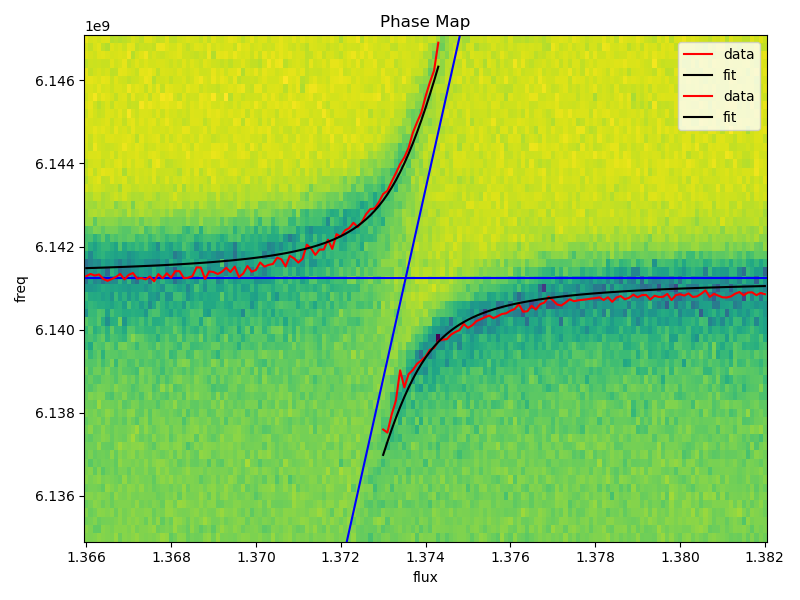

In [593]:
########################  fit with the actual values  ##########################

%matplotlib widget

amp = datasets[412505]['amp']
ampV = np.sqrt(0.05)*10**(amp/20)
amp_norm = ampV/ampV.mean()
x = datasets[412505]['flux']
iA = np.argmin(np.abs(x - 1.37443))
xA = x[:iA]
iB = np.argmin(np.abs(x - 1.37243)) + 6
xB = x[iB:]

y = datasets[412505]['freq']
y = y[0,:]


fig, ax, mesh = plot_phase_map(datasets[412505], 'flux', 'freq', 'amp', title='Phase Map', correct_horizontal=False, correct_vertical=False, fig=None, ax=None)
# ax.plot(xA, curveA, 'k')

fr = 6.14125e9
fq = 4.566e9*x - 0.1303e9
# line = 1.78796e9*x + 3.684e9

def cA(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq +np.sqrt((fq - fr)**2 + (g/np.pi)**2))

def cB(x,g):
    fq = 4.566e9*x - 0.1303e9
    return 0.5*(fr + fq - np.sqrt((fq - fr)**2 + (g/np.pi)**2))


poptA, pcovA = curve_fit(cA, xA, curveA, p0 = 10e6)
print('g from fit A is', poptA*1e-6, 'MHz')

poptB, pcovB = curve_fit(cB, xB, curveB, p0 = 10e6)
print('g from fit B is', poptB*1e-6, 'MHz')

ax.axhline(6.14125e9,c='b')
ax.plot(x,fq,'b')

ax.plot(xA, curveA, color='r', label='data')
ax.plot(xA, cA(xA,poptA), color = 'k', label='fit')

ax.plot(xB, curveB,color='r', label='data')
ax.plot(xB,cB(xB,poptB), color = 'k', label='fit')

ax.legend()
plt.ylim([6.1349e9,6.14708e9])
plt.show()



In [594]:

plt.close('all')